**ATOC4500 Data Science Lab - Lecture #5 Notebook** 

*last updated: February 15, 2022* 

*Written by Prof. Kay (Jennifer.E.Kay@colorado.edu)*

In [1]:
## Load Python Packages

import scipy.stats as stats
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from google.colab import files
from matplotlib.gridspec import GridSpec

import seaborn as sns  ### seaborn just makes things pretty -- no new typing
sns.set_style('whitegrid')  ###  change away from grey grid (seaborn default) to white grid

##**Red Noise vs. White Noise**##

In [ ]:
# --------------------------- Function -----------------------
def ar1_series(a,N):
    red_series = []
    red_series.append(1)
    for t in range(1,N,1):
        red_series.append(a*red_series[t-1] + np.sqrt(1-np.power(a,2))*stats.norm.rvs(size=1)) ##Barnes Ch. 2 Eq. 69
    return red_series

In [ ]:
# create white, pink, and red noise
length=500
white_noise = ar1_series(0,length)
pink_noise = ar1_series(0.5,length)
red_noise = ar1_series(0.99,length)

/usr/local/lib/python3.7/dist-packages/numpy/core/shape_base.py:65: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  ary = asanyarray(ary)


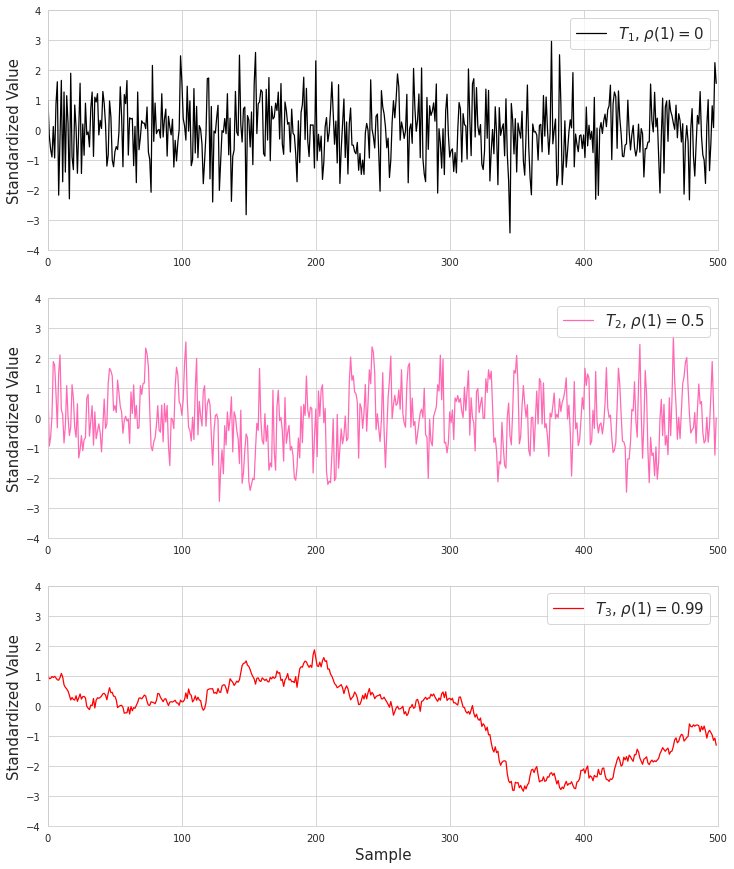

In [ ]:
f=plt.figure(figsize=(12,15))  ## set the figure size
plt.title('Standardized Red Noise Timeseries',fontsize=12);
gs=GridSpec(3,1);
plt.subplot(gs[0,0]);
plt.plot(white_noise, color='black', lw=1.25, label=r"$T_1$, $\rho(1)=0$"); 
plt.legend(fontsize=15,loc='upper right');
plt.axis([0,length,-4,4]);
plt.ylabel('Standardized Value',fontsize=15)
plt.subplot(gs[1,0]);
plt.plot(pink_noise, color='hotpink', lw=1.25, label=r"$T_2$, $\rho(1)=0.5$");
plt.legend(fontsize=15,loc='upper right');
plt.axis([0,length,-4,4]);
plt.ylabel('Standardized Value',fontsize=15)
plt.subplot(gs[2,0]);
plt.plot(red_noise, color='red', lw=1.25, label=r"$T_3$, $\rho(1)=0.99$");
plt.legend(fontsize=15,loc='upper right');
plt.axis([0,length,-4,4]);
plt.xlabel('Sample',fontsize=15);
plt.ylabel('Standardized Value',fontsize=15);

##**Autocorrelation and Effective Sample Size with real data**##

####The data are from the [NCAR Mesa Lab Weather Station](https://archive.eol.ucar.edu/cgi-bin/weather.cgi?site=ml&period=5-minute&fields=tdry&fields=rh&fields=cpres0&fields=wspd&fields=wdir&fields=raina&units=metric) in Boulder, Colorado.####
---





####STEP 1: Read in the data.

In [2]:
# PLEASE MAKE SURE YOU ARE USING GOOGLE CHROME as your browser, otherwise it may not load the file
# click on "Choose Files" to upload mesa_lab_data_dec29-31_2021_nomissing.csv
uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

Saving mesa_lab_data_dec29-31_2021_nomissing.csv to mesa_lab_data_dec29-31_2021_nomissing.csv
User uploaded file "mesa_lab_data_dec29-31_2021_nomissing.csv" with length 48366 bytes


In [60]:
filename = 'mesa_lab_data_dec29-31_2021_nomissing.csv'
data=pd.read_csv(filename,sep=',')
print(data.head())
print(data.tail())
data

   days  hour_frac     pres_mb  ...  wspdmax_m_per_s  raina_event_mm  Unnamed: 9
0   363   0.000000  794.799988  ...              9.9             0.0           1
1   363   0.083333  794.900024  ...              9.3             0.0           2
2   363   0.166667  794.900024  ...              9.8             0.0           3
3   363   0.250000  794.900024  ...              8.2             0.0           4
4   363   0.333333  794.900024  ...              7.5             0.0           5

[5 rows x 10 columns]
     days  hour_frac     pres_mb  ...  wspdmax_m_per_s  raina_event_mm  Unnamed: 9
859   365  23.583333  794.900024  ...              4.8             0.0         860
860   365  23.666667  795.000000  ...              5.2             0.0         861
861   365  23.750000  795.099976  ...              4.6             0.0         862
862   365  23.833333  795.099976  ...              4.5             0.0         863
863   365  23.916667  795.099976  ...              4.2             0.0      

,days,hour_frac,pres_mb,tdry_degC,rh_percent,wdir,wspd_m_per_s,wspdmax_m_per_s,raina_event_mm,Unnamed: 9
0,363,0.000000,794.799988,-1.9,33.200001,176,6.4,9.9,0.0,1
1,363,0.083333,794.900024,-2.1,33.599998,183,6.8,9.3,0.0,2
2,363,0.166667,794.900024,-2.0,32.799999,177,7.1,9.8,0.0,3
3,363,0.250000,794.900024,-2.1,33.099998,183,4.8,8.2,0.0,4
4,363,0.333333,794.900024,-2.3,33.099998,181,5.5,7.5,0.0,5
...,...,...,...,...,...,...,...,...,...,...
859,365,23.583333,794.900024,-4.4,86.500000,100,1.8,4.8,0.0,860
860,365,23.666667,795.000000,-4.4,86.500000,87,2.0,5.2,0.0,861
861,365,23.750000,795.099976,-4.5,86.599998,100,1.6,4.6,0.0,862
862,365,23.833333,795.099976,-4.4,86.699997,84,2.4,4.5,0.0,863


####STEP 2: Look at your data. How long are the data for? What is the timestep?  What variables are available?

## WRITE NOTES HERE:##

(864,)


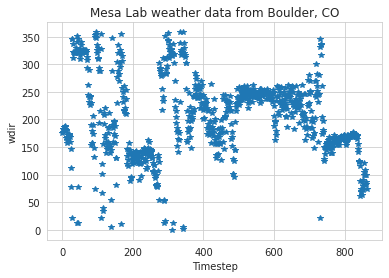

In [61]:
## Look at data
variable='wdir' ## try 'pres_mb', 'tdry_degC', 'rh_percent', 'wdir', 'wspd_m_per_s', 'wspdmax_m_per_s'
tseries=data[variable]
print(tseries.shape)
plt.plot(tseries,'*');  ## quick plot to look at data
plt.title('Mesa Lab weather data from Boulder, CO');
plt.ylabel(variable);
plt.xlabel('Timestep');

(12,)
(12,)


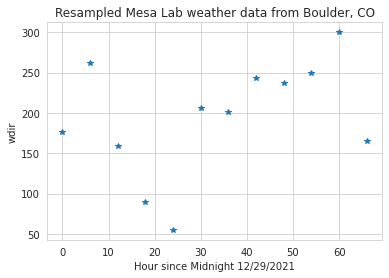

In [62]:
## Resample the data and Plot it again - JUST FOR FUN...
Nhrs=6 ## sampling rate in hours
Ndays=3
hours=np.arange(0,24*Ndays,Nhrs*1.)

print(hours.shape)
#print(hours)
samples_per_hour=12
tseries_resampled=tseries[::samples_per_hour*Nhrs] ## take the temperature every Nhrs
print(tseries_resampled.shape)

plt.plot(hours,tseries_resampled,'*');    ## quick plot to look at data sampled every 3 hours
plt.title('Resampled Mesa Lab weather data from Boulder, CO');
plt.ylabel(variable);
plt.xlabel('Hour since Midnight 12/29/2021');
#print(tseries_resampled)

####STEP 3: Calculate some Basic Stats -- Then estimate the lag-1 autocorrelation

In [66]:
### Calculate some basic statistics about your data variable
#data=tseries
data=tseries_resampled

N=len(data)
sigma=np.std(data)  ## calculate the standard deviation
mean=np.mean(data)  ## calculate the mean
print('Sample Size N=',N)
print('Mean',round(mean,1))
print('Standard Deviation',round(sigma,1))

Sample Size N= 12
Mean 195.3
Standard Deviation 68.3


In [67]:
## Estimate lag-1 autocorrelation
lag=1
t1_m=data[0:-1*lag]-mean
t2_m=data[lag:]-mean

#Method #1
#Calculate the autocorrelation using numpy correlate lagN
AR1_np=np.correlate(t1_m,t2_m,mode='valid')/(N-lag)/(sigma**2)
print('np.correlate AR1:',round(AR1_np[0],5))

#Method #2 - direct calculation
#Calculate the autocorrelation using numpy dot
## (https://docs.scipy.org/doc/numpy-1.13.0/reference/generated/numpy.dot.html)
AR1=np.dot(t1_m,t2_m)/(N-lag)/sigma**2 ## Barnes Chapter 2 Eq. 68 divided by the variance
print('direct calculation AR1:',round(AR1,5))

np.correlate AR1: 0.40057
direct calculation AR1: 0.40057


#### STEP 4: Calculate the effective sample size


In [68]:
## Calculate effective sample size
print(AR1)
Nstar_wilks=round(((1-AR1)/(1+AR1))*N) ## Barnes Chapter 2 eq. 88
print('Sample Size:',N)
print('Effective Sample Size Wilks (#independent samples):',Nstar_wilks)

0.40056896045551504
Sample Size: 12
Effective Sample Size Wilks (#independent samples): 5


#### If time, Tinker!!  Pick a different variable and see if it is redder or whiter than wind speed.